In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import warnings

**Base de dados**

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(
    '../data/house/housing.csv', sep = ',',
    encoding = 'iso-8859-1'
)

# Exploração e tratamento dos dados #
**Atributos Previsores**

<span  style="font-size: 13px; font-family: 'Trebuchet MS', sans-serif;">

- RM: é o número médio de cômodos entre os imóveis no bairro. </br>

- LSTAT: é a porcentagem de proprietários no bairro considerados de "classe baixa".

- PTRATIO: é a razão entre estudantes e professores nas escolas de ensino fundamental e médio no bairro.
</span>

**Variável alvo**

- MEDV: valor médio das casas

## Analise de atributos e tipos ##

**Valores missing**

In [4]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

**Análise dos tipos de atributos**

In [5]:
df.shape

(2340, 4)

In [6]:
df.dtypes

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object

**Dados Estatísticos**

In [7]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,2340.000000,2340.000000,2340.000000,2.340000e+03
mean,6.335303,8.164996,17.729274,5.339491e+05
std,0.493287,5.993575,1.726801,1.493607e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,6.009000,3.740000,16.600000,4.326000e+05
50%,6.335000,5.250000,16.600000,5.250000e+05
75%,6.635000,11.280000,19.200000,6.468000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


## Análise dos outliers ##

**Número médio de cômodos por casa no bairro**

In [8]:
boxplot = px.box(df, y = "RM", width=600, height=400, boxmode='overlay', color_discrete_sequence=["hotpink"])
boxplot.show()

**Proprietários classe baixa no bairro**

In [9]:
boxplot = px.box(df, y = "LSTAT", width=600, height=400, boxmode='overlay', color_discrete_sequence=["royalblue"])
boxplot.show()

**Razão entre n. de alunos e professores no bairro**

In [10]:
boxplot = px.box(df, y = "PTRATIO", width=600, height=400, boxmode='overlay', color_discrete_sequence=["seagreen"])
boxplot.show()

**Valor médio das casas**

In [11]:
boxplot = px.box(df, y = "MEDV", width=600, height=400, boxmode='overlay', color_discrete_sequence=["blueviolet"])
boxplot.show()

## Gráficos de dispersão ##

**Número médio de cômodos por casa no bairro**

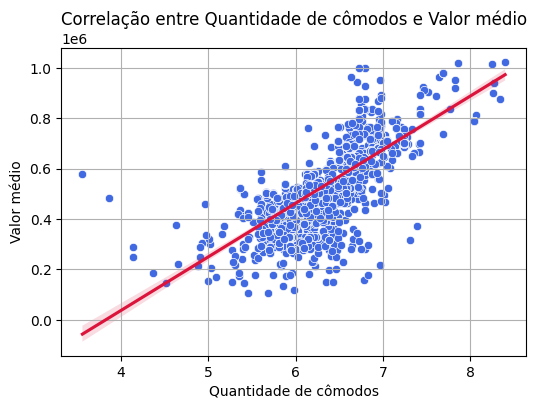

In [12]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="RM", y="MEDV", color='royalblue')

sns.regplot(data=df, x="RM", y="MEDV", scatter=False, color='crimson')

plt.title('Correlação entre Quantidade de cômodos e Valor médio')
plt.xlabel('Quantidade de cômodos')
plt.ylabel('Valor médio')
plt.grid(True)

plt.show()

**Proprietários classe baixa no bairro**

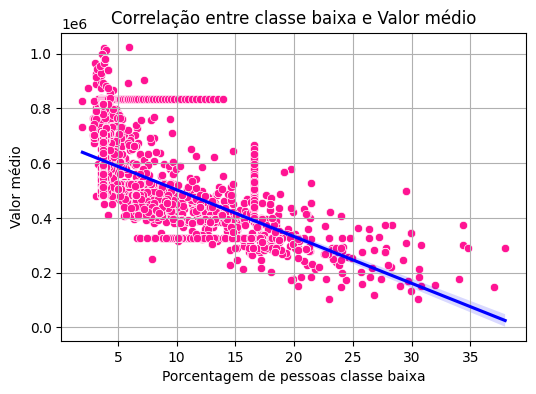

In [13]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="LSTAT", y="MEDV", color='deeppink')

sns.regplot(data=df, x="LSTAT", y="MEDV", scatter=False, color='blue')

plt.title('Correlação entre classe baixa e Valor médio')
plt.xlabel('Porcentagem de pessoas classe baixa')
plt.ylabel('Valor médio')
plt.grid(True)
plt.show()

**Razão entre n. de alunos e professores no bairro**

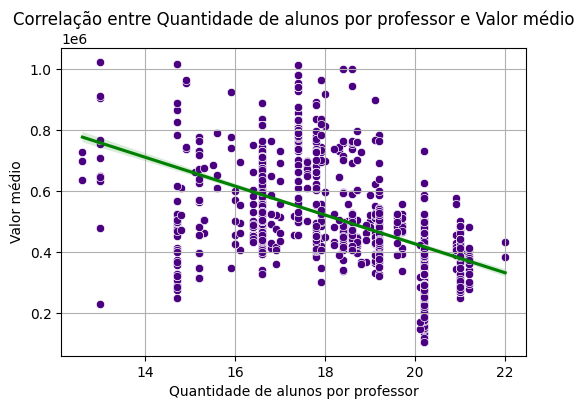

In [14]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="PTRATIO", y="MEDV", color='indigo')

sns.regplot(data=df, x="PTRATIO", y="MEDV", scatter=False, color='green')

plt.title('Correlação entre Quantidade de alunos por professor e Valor médio')
plt.xlabel('Quantidade de alunos por professor')
plt.ylabel('Valor médio')
plt.grid(True)
plt.show()

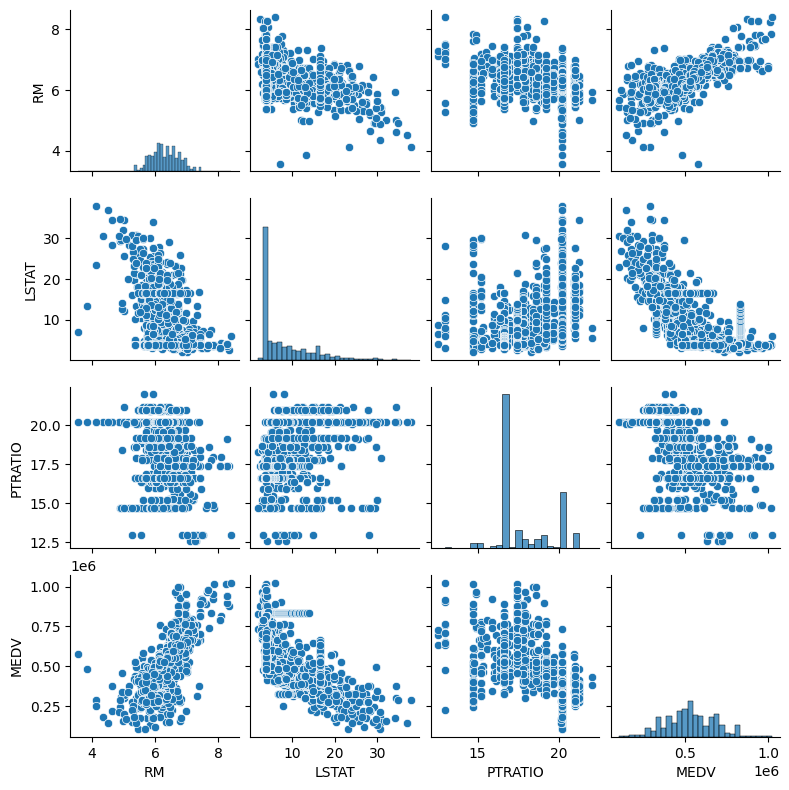

In [15]:
sns.pairplot(df, height=2);

## Análise da Normalidade ##

### Gráfico QQ-Plot ###

**Valor médio das casas no bairro**

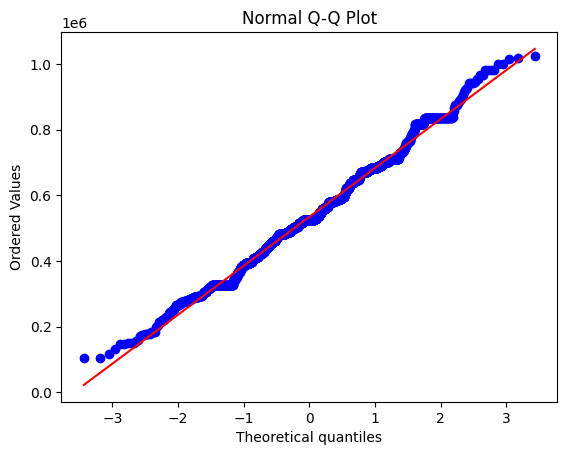

In [16]:
stats.probplot(df['MEDV'], dist = 'norm', plot = plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [17]:
hist = px.histogram(df, x = "MEDV", nbins = 60)
hist.update_layout(width = 600, height = 400, title_text = "Média dos valores")
hist.show()

**Número médio de cômodos por casa**

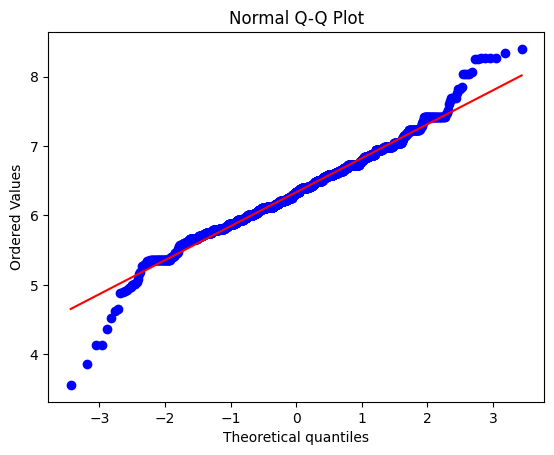

In [18]:
stats.probplot(df['RM'], dist = 'norm', plot = plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [19]:
hist = px.histogram(df, x = "RM", nbins = 60)
hist.update_layout(width = 600, height = 400, title_text = "Cômodos por casa")
hist.show()

**Proprietários classe baixa no bairro**

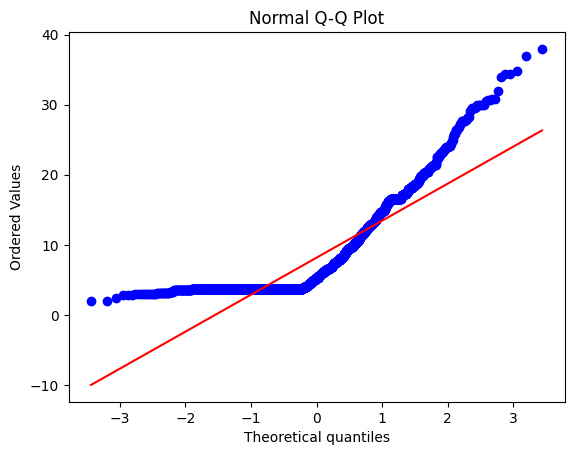

In [20]:
stats.probplot(df['LSTAT'], dist = 'norm', plot = plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [21]:
hist = px.histogram(df, x = "LSTAT", nbins = 60)
hist.update_layout(width = 600, height = 400, title_text = "Porcentagem de pessoas classe baixa")
hist.show()

**Razão entre n. de alunos e professores no bairro**

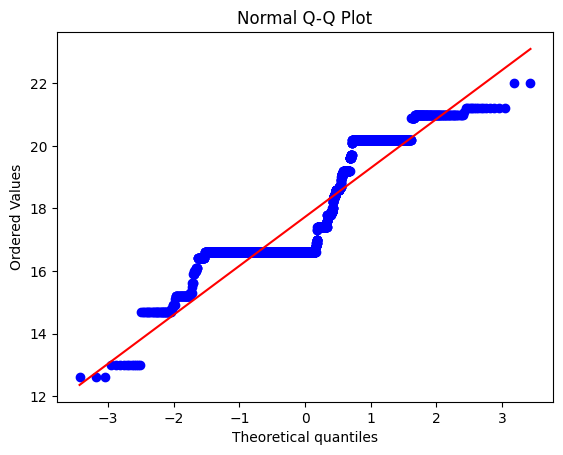

In [22]:
stats.probplot(df['PTRATIO'], dist = 'norm', plot = plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [23]:
hist = px.histogram(df, x = "PTRATIO", nbins = 60)
hist.update_layout(width = 600, height = 400, title_text = "Quantidade de alunos por professor")
hist.show()

## Teste Estatístico ##
<span style="font-size: 14px;">

**HO = Distribuição normal:** p-valor > 0.05 </br></br>
**HA = Distribuição não normal:** p-valor < = 0.05
</span>


**MEDV**

In [24]:
estatistica, p = stats.shapiro(df.MEDV)
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.9928
p-valor: 2.4282e-09


In [25]:
estatistica, p = lilliefors(df.MEDV, dist = 'norm')
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.0585
p-valor: 1.0000e-03


**RM**

In [26]:
estatistica, p = stats.shapiro(df.RM)
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.9827
p-valor: 3.0274e-16


In [27]:
estatistica, p = lilliefors(df.RM, dist = 'norm')
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.0425
p-valor: 1.0000e-03


**LSTAT**

In [28]:
estatistica, p = stats.shapiro(df.LSTAT)
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.7768
p-valor: 8.2119e-49


In [29]:
estatistica, p = lilliefors(df.LSTAT, dist = 'norm')
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.2039
p-valor: 1.0000e-03


**PTRATIO**

In [30]:
estatistica, p = stats.shapiro(df.PTRATIO)
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.8185
p-valor: 1.7000e-45


In [31]:
estatistica, p = lilliefors(df.PTRATIO, dist = 'norm')
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.3071
p-valor: 1.0000e-03


## Correlação Linear ##

<span style="font-size: 13px;">
<li><strong>Coeficiente de Pearson </strong> -> Distribuição normal</li> </br>
<li><strong>Coeficiente de Spearman</strong> -> Distribuição <strong>não</strong> normal</li></br>
<li><strong>Coeficiente de Kendall</strong> -> Distribuição <strong>não</strong> normal</li>
</span>

**Pearson**

In [32]:
coef, p = stats.pearsonr(df.MEDV, df.RM)
print('Coeficiente de correlação: {:.2f}'.format(coef))
print('p-valor: {:.2e}'.format(p))

Coeficiente de correlação: 0.70
p-valor: 0.00e+00


**Spearman** </br>

*Iremos usá-lo*

<span style="font-size: 13px;"> 
<li>Coeficiente de correlação: 0.73 -> Uma correlação de 0.73 é considerada moderadamente forte.</li> </br>
<li>p-valor: 0.00e+00O -> p-valor gerado é muito baixo e indica que há evidências estatisticamente significativas para rejeitar a hipótese nula de que não há correlação entre as duas variáveis. 
Em outras palavras,<strong> há uma forte correlação entre as variáveis MEDV e RM.</strong> </li>
</span>

In [33]:
coef, p = stats.spearmanr(df.MEDV, df.RM)
print('Coeficiente de correlação: {:.2f}'.format(coef))
print('p-valor: {:.2e}'.format(p))

Coeficiente de correlação: 0.73
p-valor: 0.00e+00


**Kendall**

In [34]:
coef, p = stats.kendalltau(df.MEDV, df.RM)
print('Coeficiente de correlação: {:.2f}'.format(coef))
print('p-valor: {:.2e}'.format(p))

Coeficiente de correlação: 0.53
p-valor: 0.00e+00


In [35]:
correlacoes = df.corr(method = 'spearman')
correlacoes

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.347137,-0.155367,0.731275
LSTAT,-0.347137,1.000000,0.550828,-0.698332
PTRATIO,-0.155367,0.550828,1.000000,-0.489611
MEDV,0.731275,-0.698332,-0.489611,1.000000


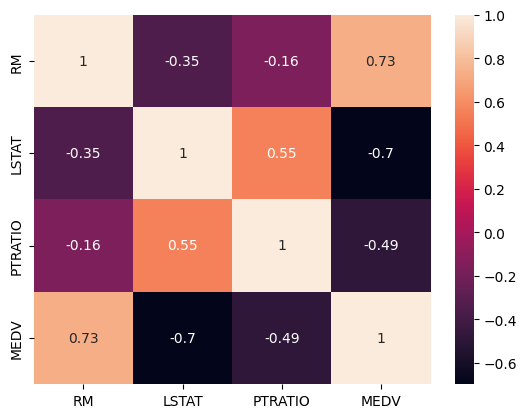

In [36]:
plt.figure()
sns.heatmap(correlacoes, annot = True);

# Regressão com Árvores de Decisão #
<span style="font-size: 13px; font-family: 'Trebuchet MS', sans-serif;">

**Conceitos Básicos** </br>
Uma árvore de decisão é uma estrutura de árvore onde cada nó interno representa um teste em um atributo, cada ramo representa o resultado do teste e cada folha representa uma decisão ou um valor numérico. </br> Em problemas de regressão, as árvores de decisão são construídas de forma a prever valores numéricos para a variável alvo.

**Formulação do Problema** </br>
A construção de uma árvore de decisão para regressão envolve a divisão recursiva do conjunto de dados com base nos atributos, de modo a minimizar a variância dos valores de destino em cada nó folha.

**Fórmula para a Divisão do Conjunto de Dados** </br>
A fórmula para dividir o conjunto de dados em um nó interno de uma árvore de decisão para regressão pode ser baseada em diferentes critérios, sendo o mais comum o critério de minimização da variância.</br> Para cada atributo $(j)$ e valor de divisão $(s)$, a variância total é calculada como:
$$ [
\text{Var}(D) = \frac{1}{|D|} \sum_{i \in D} (y_i - \bar{y})^2
] $$
onde $(D)$ é o conjunto de dados no nó, $(|D|)$ é o número de exemplos no conjunto de dados, $(y_i)$ é o valor da variável alvo para o exemplo $(i)$ e $(\bar{y})$ é a média dos valores da variável alvo no conjunto de dados.

**Parâmetros dos Modelos de Árvores de Decisão** </br>
- **Critério de Divisão**: Critério utilizado para medir a qualidade da divisão do conjunto de dados em cada nó. Para regressão, o critério comum é a minimização da variância (default) ou o erro absoluto médio.
- **Profundidade Máxima da Árvore**: Número máximo de níveis na árvore.
- **Mínimo de Amostras por Folha**: Número mínimo de amostras necessárias em uma folha da árvore.
- **Número Mínimo de Amostras para Divisão**: Número mínimo de amostras necessárias para considerar a divisão de um nó.

</span>

## Tratamento das variáveis ##

### Separação em independente e dependente

In [37]:
independente = df.iloc[:, 0:3].values
independente

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 5.727, 16.6  , 16.6  ],
       [ 6.152, 16.6  , 16.6  ],
       [ 6.289, 16.6  , 16.6  ]])

In [38]:
independente.shape

(2340, 3)

In [39]:
dependente = df.iloc[:, 3].values
dependente

array([504000., 453600., 728700., ..., 439200., 533400., 529800.])

In [40]:
dependente.shape

(2340,)

### Separação entre treino e teste

In [41]:
x_train, x_test, y_train, y_test = train_test_split(
    independente, dependente,
    test_size = 0.3, random_state = 0
)

In [42]:
x_train.shape, x_test.shape

((1638, 3), (702, 3))

## Criação do Algoritmo

In [43]:
arvore = DecisionTreeRegressor(
    max_depth = 5,
    random_state = 10
)
arvore.fit(x_train, y_train);

**Score de treino**

In [44]:
arvore.score(x_train, y_train)

0.8775105873641458

**Score de teste**

In [45]:
arvore.score(x_test, y_test)

0.8577759666870475

### Previsões

In [46]:
previsoes_test = arvore.predict(x_test)
previsoes_test

array([644399.9047619 , 429033.93977273, 429033.93977273, 511484.21052632,
       445200.        , 511484.21052632, 668249.20641711, 480119.33083333,
       765033.14571429, 289058.79411765, 644399.9047619 , 429033.93977273,
       554994.78157895, 453555.        , 668249.20641711, 380805.15693431,
       644399.9047619 , 480119.33083333, 480119.33083333, 500244.31962025,
       668249.20641711, 391199.97142857, 500244.31962025, 644399.9047619 ,
       511484.21052632, 668249.20641711, 380805.15693431, 668249.20641711,
       554994.78157895, 325831.63263158, 500244.31962025, 361725.        ,
       644399.9047619 , 644399.9047619 , 668249.20641711, 820086.3137931 ,
       820086.3137931 , 500244.31962025, 380805.15693431, 668249.20641711,
       644399.9047619 , 325831.63263158, 380805.15693431, 511484.21052632,
       511484.21052632, 644399.9047619 , 644399.9047619 , 380805.15693431,
       644399.9047619 , 361725.        , 959175.725     , 429033.93977273,
       380805.15693431, 4

### Métricas ###

In [47]:
mean_absolute_error(y_test, previsoes_test)

39428.32459522513

In [48]:
mean_squared_error(y_test, previsoes_test)

3245398631.99631

In [49]:
np.sqrt(mean_squared_error(y_test, previsoes_test))

56968.40029346366

### Cross Validation

In [50]:
kfold = KFold(n_splits = 15, shuffle = True, random_state = 5)

In [51]:
modelo = DecisionTreeRegressor(
    max_depth = 5,
    random_state = 10
)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)

In [52]:
print("Acurácia média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia média: 85.54%
